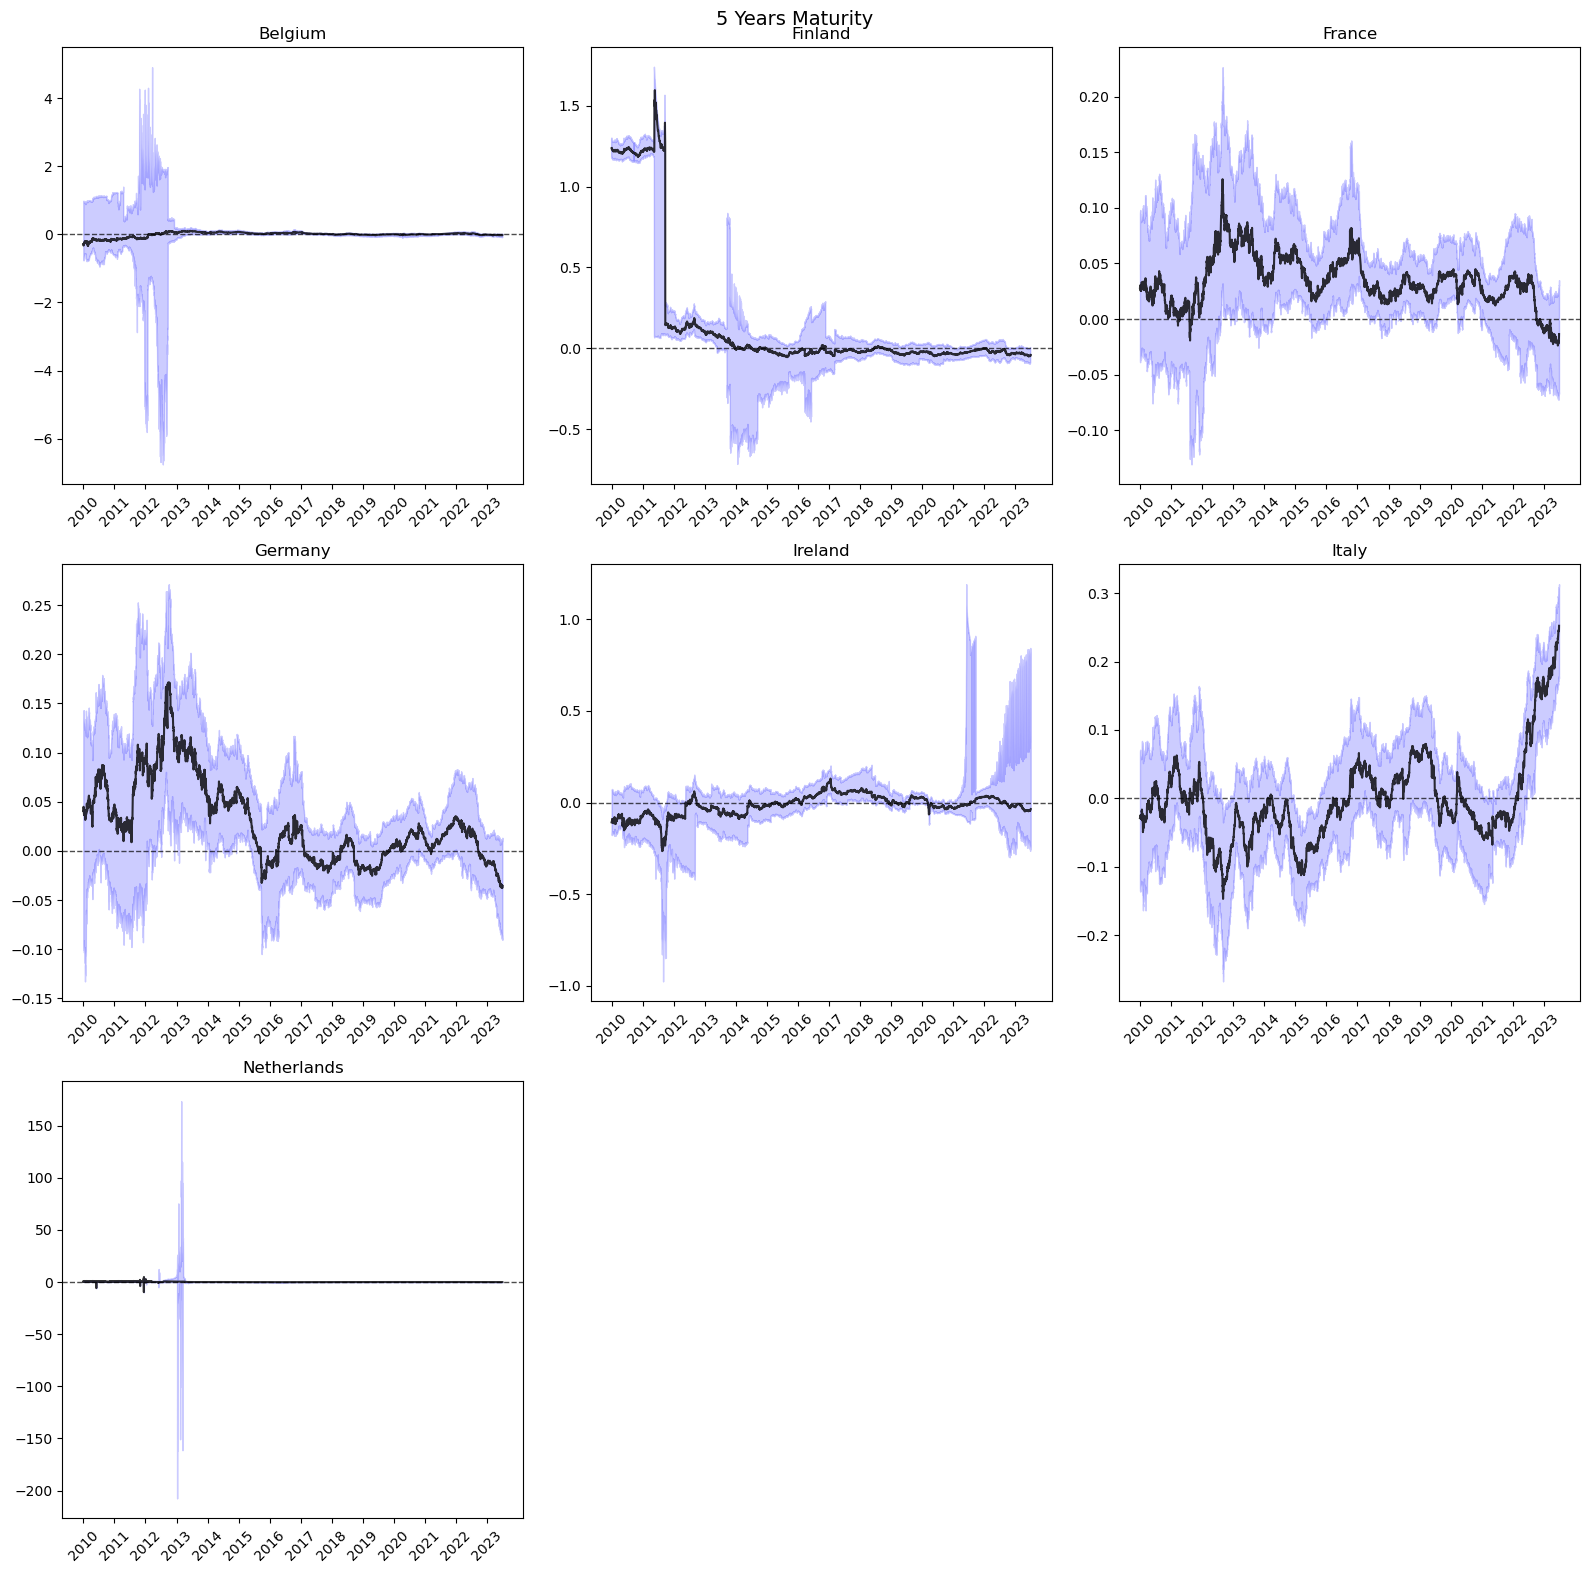

In [8]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

file_path_1 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot1/All_Euro/df_interest_corporate_wo_CDS_all_euro_normal.mat"
    
    # Load the Eurozone-wide interest rate data
mat_data_1 = sio.loadmat(file_path_1)
df_interest = mat_data_1['df_interest_datastream_foreign_all']

    # Calculate interest rates from the discount factors
df_interest = ((1 / df_interest) - 1)

# List of countries to loop over
countries = [ 'Belgium', 'Finland', 'France', 'Germany', 'Ireland', 'Italy', 'Netherlands']

# Create a figure with subplots (4 plots per row, 4 rows in total, but 2 in the last row)
fig, axes = plt.subplots(3, 3, figsize=(16, 16))  # 4x4 grid

# Flatten axes array for easy iteration (as there are only 14 countries)
axes = axes.flatten()

# Loop over the list of countries and plot each one in its corresponding subplot
for idx, country in enumerate(countries):

    #if country == 'Portugal':
    #        file_path_2 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot1/Sov_CDS/df_interest_sovereign_wo_CDS_Portugal.mat"  # Example of a different file
    #        mat_data_2 = sio.loadmat(file_path_2)
    #        df_country = mat_data_2['df_interest_sovereign_CDS_all']  # Example of a different variable name
    #else:
    #    # Load the specific country's interest rate data
    #    file_path_2 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot1/Sov_wo_CDS/df_interest_sovereign_wo_CDS_{country}.mat"
    #    mat_data_2 = sio.loadmat(file_path_2)
    #    df_country = mat_data_2['df_interest_sovereign_wo_CDS_all']

    file_path_2 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot1/Cor_wo_CDS/df_interest_corporate_wo_CDS_{country}.mat"  # Example of a different file
    mat_data_2 = sio.loadmat(file_path_2)
    df_country = mat_data_2['df_interest_datastream_foreign_all']  # Example of a different variable name 

    df_country = ((1 / df_country) - 1)
    
    # Calculate the difference between Eurozone-wide and country-specific interest rates
    df_diff = df_interest - df_country
    
    # Get the data for the first maturity
    dfs = []
    for i in range(7):
        maturity_df = pd.DataFrame(df_diff[i, :, :])
        dfs.append(maturity_df)
    
    df_maturity_1 = dfs[6]  # Data for the 1st maturity
    
    # Define the date range
    start_date = datetime.datetime(2010, 1, 1)
    date_range = pd.date_range(start=start_date, periods=4928, freq='D')
    
    
    # Define positions and labels for the x-axis ticks (year start dates)
    tick_dates = pd.date_range(start=start_date, periods=4928 // 365 + 1, freq='YS')
    tick_positions = [date_range.get_loc(date) for date in tick_dates]
    
    # Compute median and confidence intervals
    mean_maturity_1 = df_maturity_1.median(axis=1)

    lower_bound = np.percentile(df_maturity_1, 2.5, axis=1)
    upper_bound = np.percentile(df_maturity_1, 97.5, axis=1)
    
    # Plot on the appropriate subplot axis
    ax = axes[idx]
    ax.plot(mean_maturity_1, label="Median", color='black', alpha=0.8)
    ax.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")
    
    # Add a horizontal line at y=0
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    
    # Set x-ticks to correspond to 1st January of each year
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_dates.strftime('%Y'), rotation=45)
    
    # Set title for each subplot
    ax.set_title(f"{country}")

    
    # Add grid and layout adjustments
    ax.grid(False)

for j in range(7, 9):
    fig.delaxes(axes[j])

# Adjust the overall layout
plt.suptitle('5 Years Maturity', fontsize=14)
plt.tight_layout()

plt.savefig("C:/Users/defaultuser0/Desktop/Sneha_thesis/Plot_Chi/Corporate/Difference/Without CDS Unweighted/5 Year")
plt.show()



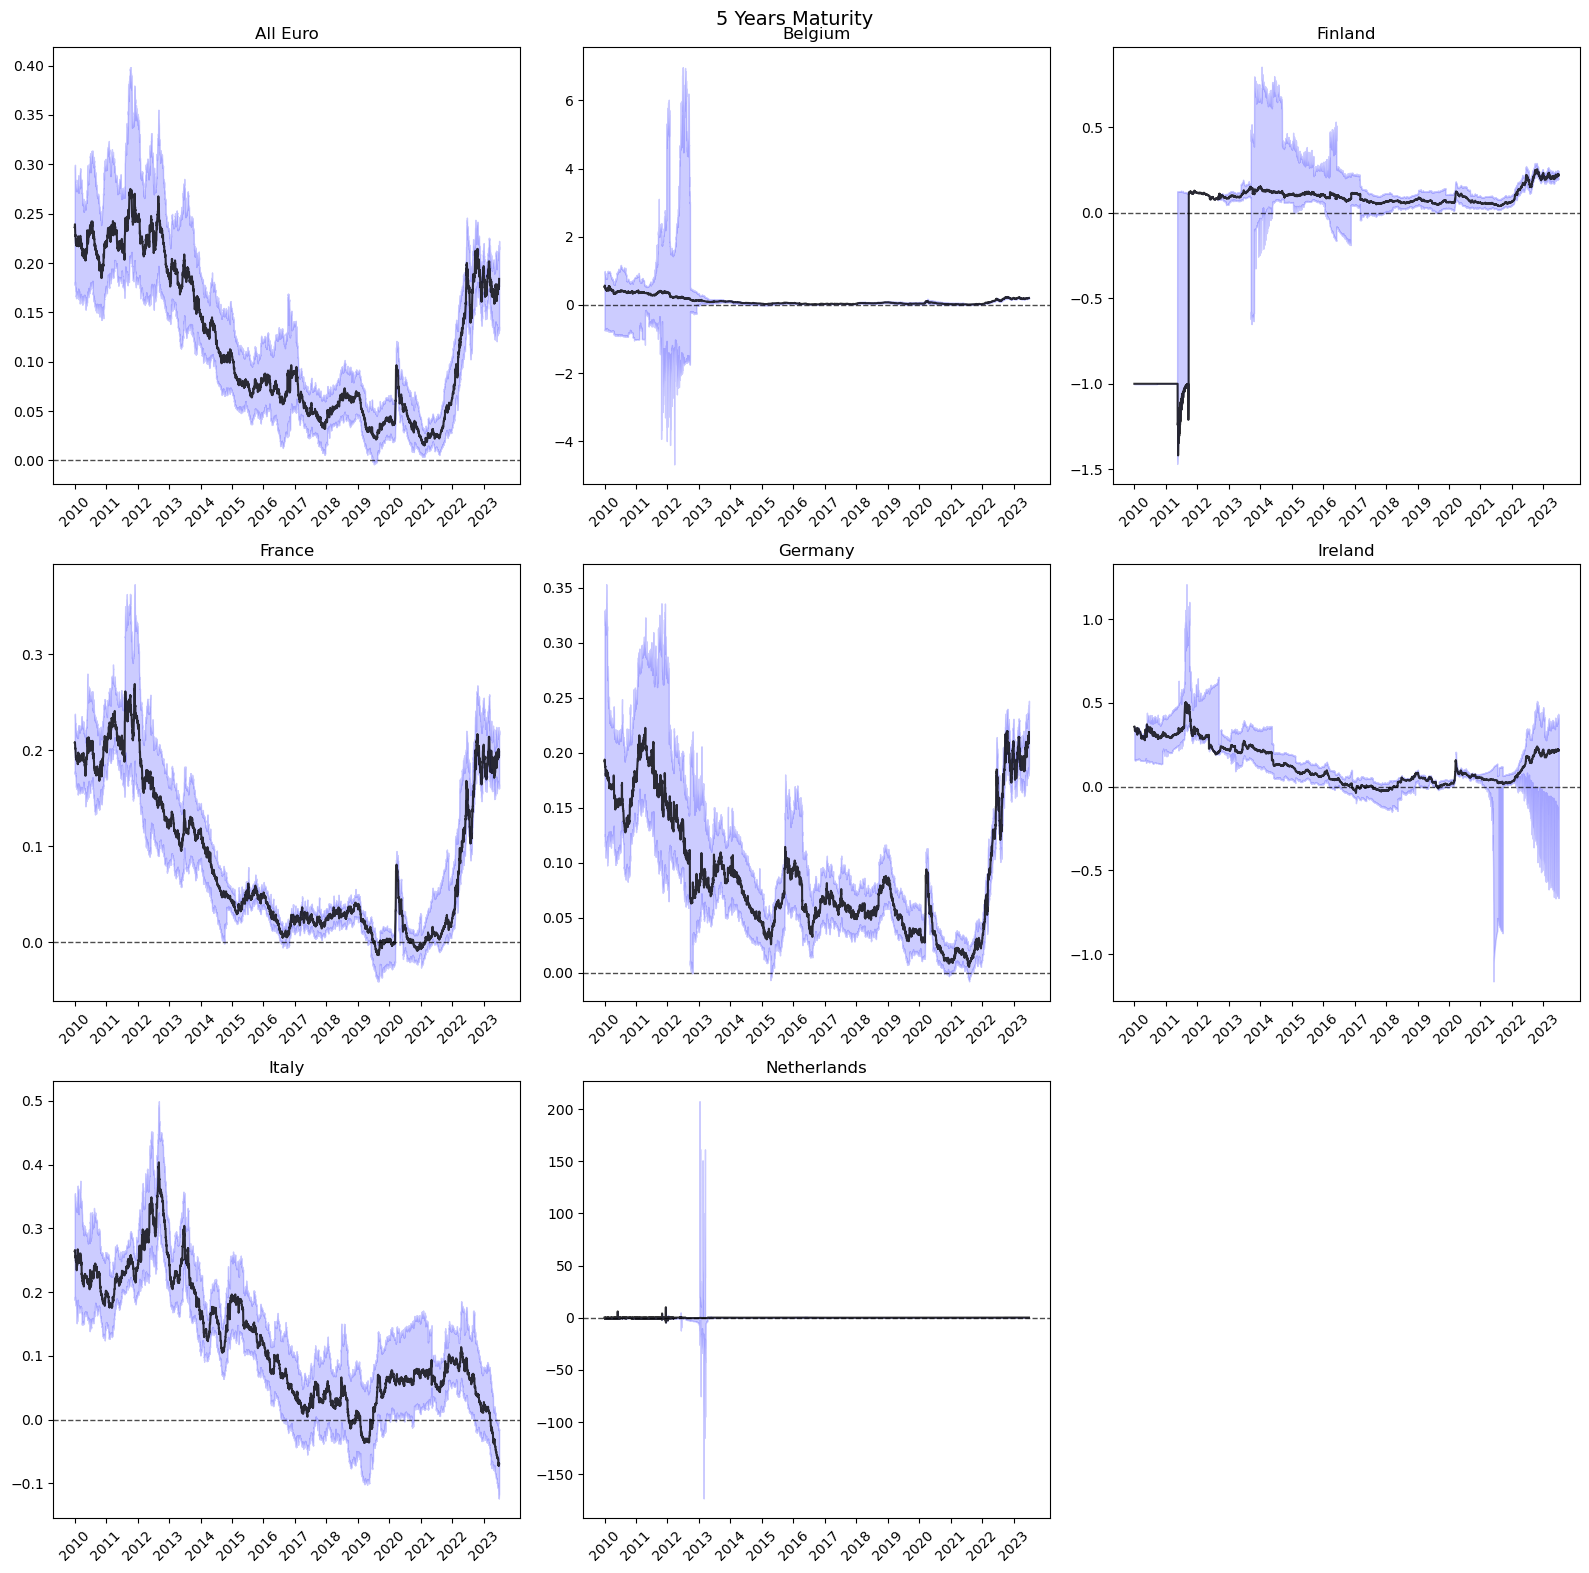

In [17]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime



# List of countries to loop over
countries = [ 'All Euro', 'Belgium',  'Finland', 'France', 'Germany', 'Ireland', 'Italy', 'Netherlands']

# Create a figure with subplots (4 plots per row, 4 rows in total, but 2 in the last row)
fig, axes = plt.subplots(3, 3, figsize=(16, 16))  # 4x4 grid

# Flatten axes array for easy iteration (as there are only 14 countries)
axes = axes.flatten()

# Loop over the list of countries and plot each one in its corresponding subplot

for idx, country in enumerate(countries):

    file_path_2 = f"C:/Users/defaultuser0/Desktop/Sneha_thesis/Discount_Rate/boot1/Cor_wo_CDS/df_interest_corporate_wo_CDS_{country}.mat"  # Example of a different file
    mat_data_2 = sio.loadmat(file_path_2)
    df_country = mat_data_2['df_interest_datastream_foreign_all']  # Example of a different variable name 


    df_country = ((1 / df_country) - 1)
    

    # Get the data for the first maturity
    dfs = []
    for i in range(7):
        maturity_df = pd.DataFrame(df_country[i, :, :])
        dfs.append(maturity_df)
    
    df_maturity_1 = dfs[6]  # Data for the 1st maturity
    
    # Define the date range
    start_date = datetime.datetime(2010, 1, 1)
    date_range = pd.date_range(start=start_date, periods=4928, freq='D')
    
    
    # Define positions and labels for the x-axis ticks (year start dates)
    tick_dates = pd.date_range(start=start_date, periods=4928 // 365 + 1, freq='YS')
    tick_positions = [date_range.get_loc(date) for date in tick_dates]
    
    # Compute median and confidence intervals
    mean_maturity_1 = df_maturity_1.median(axis=1)

    lower_bound = np.percentile(df_maturity_1, 2.5, axis=1)
    upper_bound = np.percentile(df_maturity_1, 97.5, axis=1)
    
    # Plot on the appropriate subplot axis
    ax = axes[idx]
    ax.plot(mean_maturity_1, label="Median", color='black', alpha=0.8)
    ax.fill_between(range(len(mean_maturity_1)), lower_bound, upper_bound, color='blue', alpha=0.2, label="5% Confidence Interval")
    
    # Add a horizontal line at y=0
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.7)
    
    # Set x-ticks to correspond to 1st January of each year
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_dates.strftime('%Y'), rotation=45)
    
    # Set title for each subplot
    ax.set_title(f"{country}")

    
    # Add grid and layout adjustments
    ax.grid(False)

for j in range(8, 9):
    fig.delaxes(axes[j])
# Adjust the overall layout
plt.suptitle('5 Years Maturity', fontsize=14)
plt.tight_layout()

plt.savefig("C:/Users/defaultuser0/Desktop/Sneha_thesis/Plot_Chi/Corporate/Interest Rates/Without CDS/5 Year")
plt.show()

